In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [3]:
make_blobs?

In [7]:
X, y = make_blobs(100, centers=2, random_state=0)

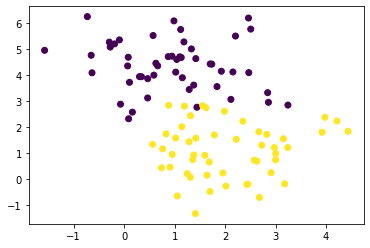

In [8]:
plt.scatter(X[:,0],X[:,1],c=y) # :,0= first column

In [5]:
model = LogisticRegression()

In [6]:
model.fit(X,y)

c:\users\shishir kumar thakur\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
model.score(X,y)

0.92

## LOGISTIC REGRESSION

In [8]:
class CustomLogisticRegression:
    
    def __init__(self, lr=.5, iters=100):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        self.X = np.hstack([np.ones([X.shape[0], 1]), X])
        self.y = y.reshape(-1, 1)
        
        self.theta = np.zeros((self.X.shape[1], 1))
        
        for i in range(self.iters):
            self.gradient_dec()
            
        
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta += d_theta
    
    def gradient(self):
        yh = CustomLogisticRegression.hypothesis(self.X, self.theta)
#         print(self.y.shape , yh.shape , self.X.shape)
        d_theta = np.mean((self.y - yh) * self.X, axis=0)
#         print(d_theta)
        return d_theta.reshape(-1, 1)

    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        yh = CustomLogisticRegression.hypothesis(X, self.theta)
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yh = self.predict(X)
        return np.sum(yh == y)/len(y)
        
    @classmethod
    def hypothesis(cls, X, theta):
        z = np.dot(X, theta)
        return 1 / (1 + np.exp(-z))

In [9]:
model = CustomLogisticRegression(iters=1000)


In [10]:
model.fit(X,y)

In [11]:
slop = -model.theta[1]/model.theta[2]
intercept = -model.theta[0]/model.theta[2]

x1 = np.linspace(-4, 6, 2)
x2 = x1 * slop + intercept

In [12]:
theta = model.theta

In [13]:
inter = -theta[0]/theta[2]
slop = -theta[1]/theta[2]

In [14]:
model.predict(X[:10])

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

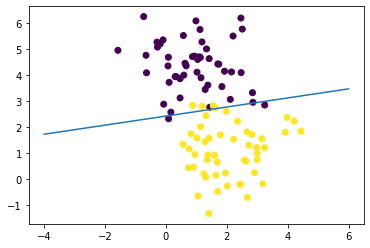

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1, x2)

In [16]:
model.predict(X[:10])

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [17]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [18]:
model.score(X[:10], y[:10])

0.9

In [19]:
import pandas as pd


In [21]:
X = pd.read_csv("Logistic_X_Train.csv").values
y = pd.read_csv("Logistic_y_Train.csv").values

X_test = pd.read_csv("Logistic_X_Train.csv").values

In [22]:
model = CustomLogisticRegression(lr=.5, iters=10000)

In [23]:
model.fit(X, y)

In [24]:
y_out = model.predict(X_test)

In [25]:
y_out = y_out.flatten()

In [26]:
y_out

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
df = pd.DataFrame.from_dict({"Outcome":y_out})

In [28]:
df.to_csv("out.csv", index=False)

In [29]:
X.shape

(3000, 3)

In [30]:
y.shape

(3000, 1)

In [31]:
y[0]

array([1], dtype=int64)

## Logistic Regression (online)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [33]:

plt.style.use('seaborn')

## Data Preparation

In [34]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


##  Data Visualise

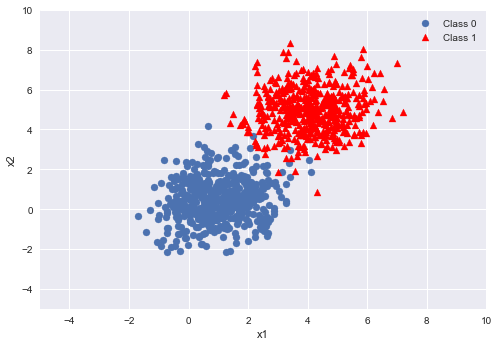

In [35]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

##  Create Training and Test Set

In [36]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [37]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [38]:
np.random.shuffle(data)
print(data[:10])

[[ 4.94632929  3.37356816  1.        ]
 [ 0.09192018  0.15507427  0.        ]
 [ 0.45609223  1.22236348  0.        ]
 [ 2.91943065  1.38606543  0.        ]
 [ 4.50526432  3.92116631  1.        ]
 [-0.17120113 -0.03257001  0.        ]
 [ 3.6297789   5.26328357  1.        ]
 [ 1.86046914  1.67719915  0.        ]
 [ 0.67379318  1.3427639   0.        ]
 [ 2.65272092  1.18388975  0.        ]]


In [39]:
split = int(0.8*data.shape[0])

In [40]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression Functions

In [41]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [42]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [43]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

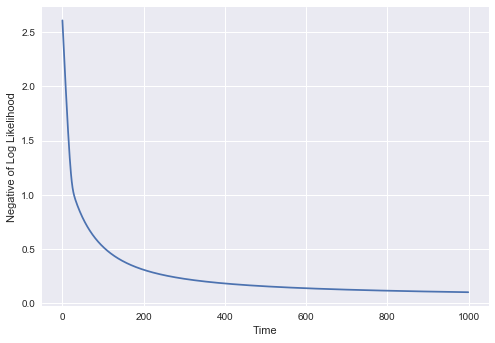

In [44]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

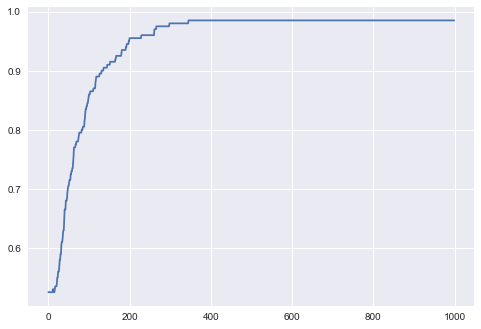

0.985


In [45]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Decision Boundary

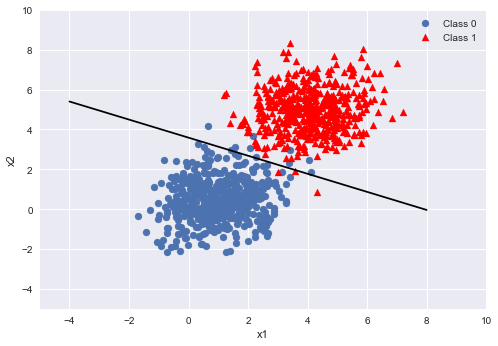

In [46]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()